In [1]:
#從 keras 的 datasets 匯入 mnist 資料集
from keras.datasets import mnist  
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#神經網路架構
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
#編譯步驟
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
#準備圖片資料
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
#準備標籤
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
#檢驗神經網路模型
#加入驗證集validation_data
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2547 - acc: 0.9266 - val_loss: 0.1402 - val_acc: 0.9596
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1051 - acc: 0.9688 - val_loss: 0.0929 - val_acc: 0.9717
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0692 - acc: 0.9789 - val_loss: 0.0724 - val_acc: 0.9784
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0497 - acc: 0.9852 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0373 - acc: 0.9887 - val_loss: 0.0682 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0677 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0

In [7]:
#評估測試資料的表現
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 38us/step
test_acc: 0.9821


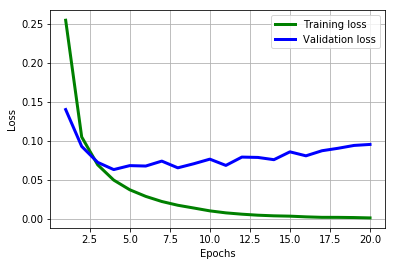

In [8]:
#繪製訓練與驗證的損失函數
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(loss_values)+ 1)

plt.plot(epochs, loss_values, 'g', label='Training loss', linewidth=3)
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

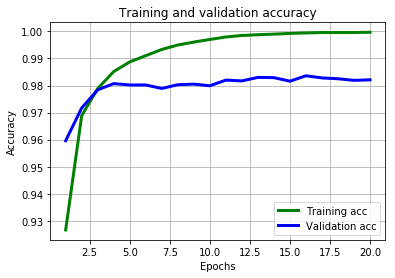

In [9]:
#繪製訓練和驗證的準確度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'g', label='Training acc', linewidth=3)
plt.plot(epochs, val_acc, 'b', label='Validation acc', linewidth=3)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)